In [38]:
!pip install -q spacy
!python -m spacy download en_core_web_sm
!python -m spacy download en_core_web_lg


✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
     |████████████████████████████████| 827.9MB 5.0MB/s eta 0:00:014    |██████▍                         | 164.0MB 5.8MB/s eta 0:01:55     |███████▎                        | 187.9MB 4.7MB/s eta 0:02:17     |█████████████▊                  | 354.9MB 6.7MB/s eta 0:01:11     |██████████████████████          | 566.9MB 558kB/s eta 0:07:48     |███████████████████████████▋    | 713.5MB 6.6MB/s eta 0:00:18
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.0-cp37-none-any.whl size=829187830 sha256=5dc5bb87d353b91804baedd018fded847f29c95f91248a359ecb61e05b56dfdb
  Stored in directory: /private/var/folders/gb/kbk0lv3d66v6tdcm6fpqc8qc0000gn/T/pip-ephem-wheel-cache-mpblojqw/wheels/9f/3c/d6/3ade7ed8195030f4d7f299cf73d856a84d7b3effd5890133fb
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')

✘ Link 'en_defa

In [55]:
!python -m spacy link --force en_core_web_sm en_core_web_sm
!python -m spacy link --force en_core_web_lg en_core_web_lg

✔ Linking successful
/Users/saiko/miniconda3/envs/saiko/lib/python3.7/site-packages/en_core_web_sm
-->
/Users/saiko/miniconda3/envs/saiko/lib/python3.7/site-packages/spacy/data/en_core_web_sm
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/Users/saiko/miniconda3/envs/saiko/lib/python3.7/site-packages/en_core_web_lg
-->
/Users/saiko/miniconda3/envs/saiko/lib/python3.7/site-packages/spacy/data/en_core_web_lg
You can now load the model via spacy.load('en_core_web_lg')


__Example 1: Entity Tagging__

In [56]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_lg")

doc = nlp("""Donald John Trump (born June 14, 1946) is the 45th and current president of
          the United States. Before entering politics, he was a businessman and television personality.""")

spacy.displacy.render(doc, style='ent')

__Example 2: Sentence Similarity__

In [100]:
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

nlp = spacy.load("en_core_web_lg")

In [168]:
docs = ["I am a Software Engineer at VISTEC.", 
        "I work in this company as a front-end developer.",
        "\"Fat Man\" was the codename for the nuclear bomb."] 

In [189]:
def plot_similarity(texts, rotation=90):
    
    features = [nlp(text) for text in texts]
    corr = [[ doc_1.similarity(doc_2) for doc_2 in features ] for doc_1 in features]
    min_corr = np.amin(corr)
    plt.figure(figsize=(5, 3))
    sns.set(font_scale=1.2)
    g = sns.heatmap(
      corr,
      xticklabels=texts,
      yticklabels=texts,
      vmin=min_corr,
      vmax=1,
      cmap="YlOrRd",square=True)
    g.set_xticklabels(texts, rotation=rotation)
    g.set_title("Sentence Similarity")

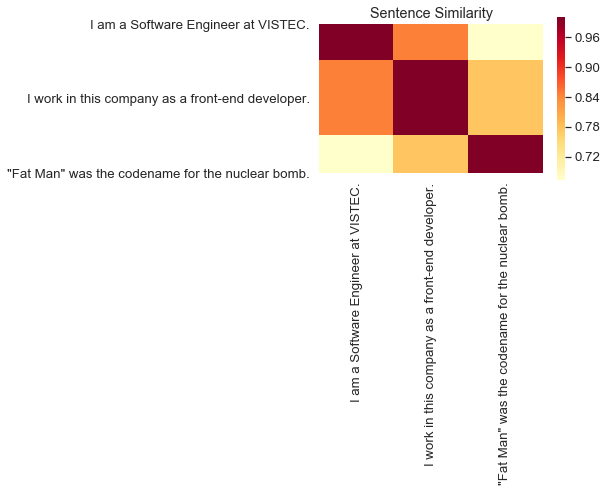

In [190]:
plot_similarity(docs)